# Part 1: Regularization with Train | Test Split

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

## 0-Setup

### Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1-Data Loading and Exploration

In [110]:
df = pd.read_csv("datasets/Advertising.csv")

In [111]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Visualization

Let's explore the relationships between different advertising channels (TV, Radio, Newspaper) and Sales through various visualizations:

<Figure size 1000x800 with 0 Axes>

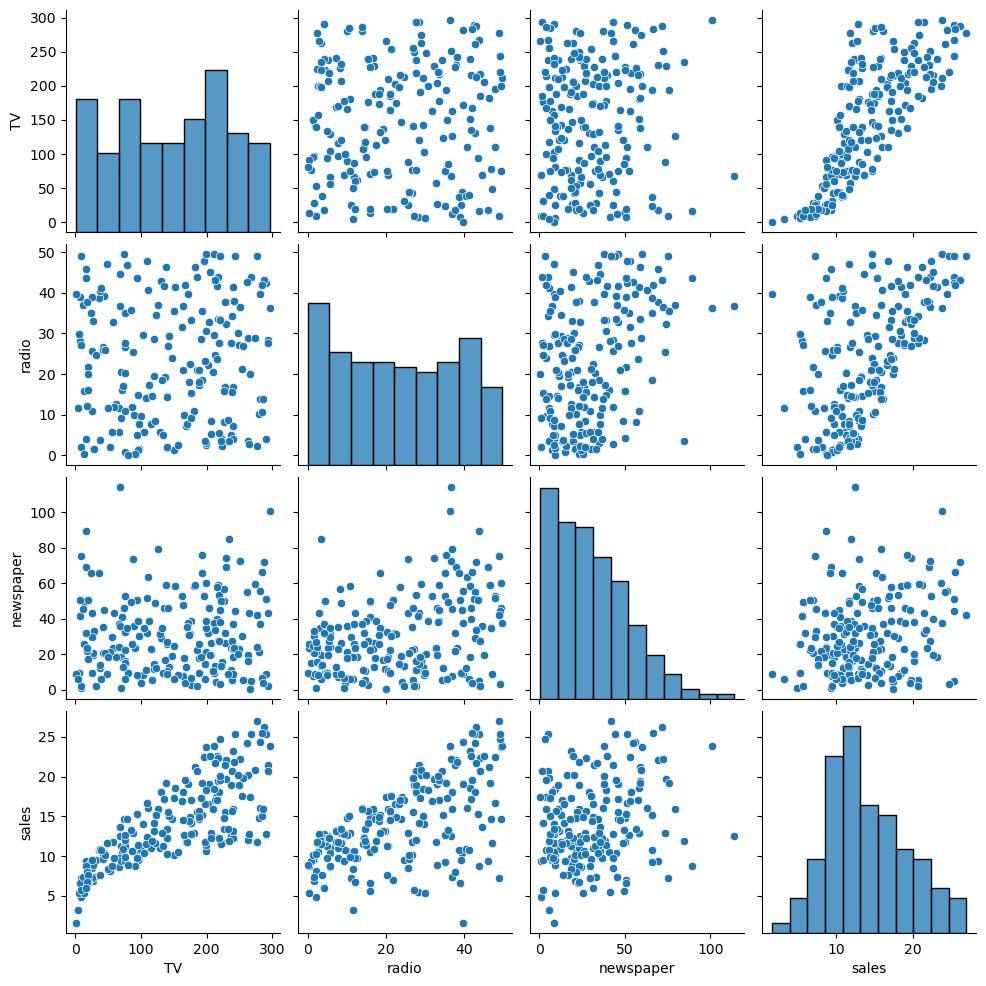

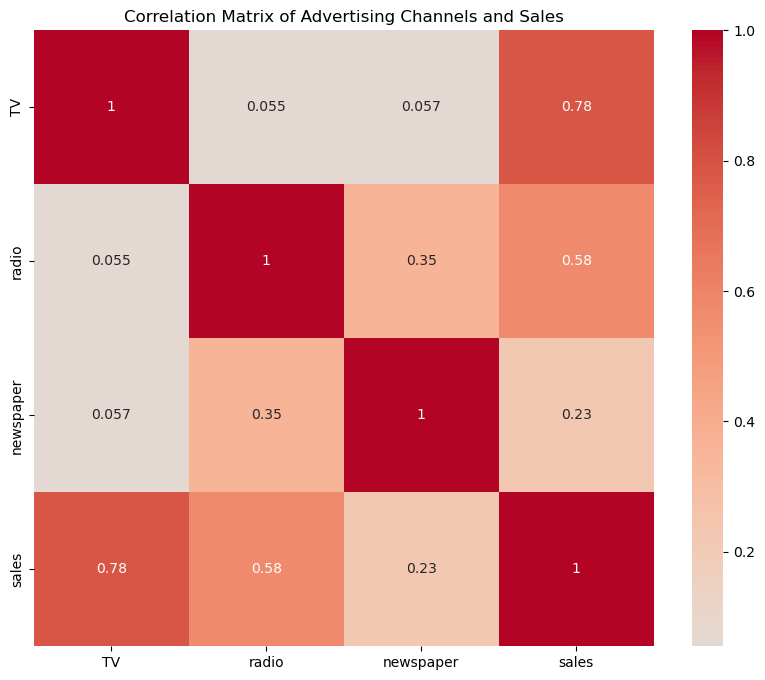

In [112]:
# Create a pairplot to show relationships between all variables
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.show()

# Display correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

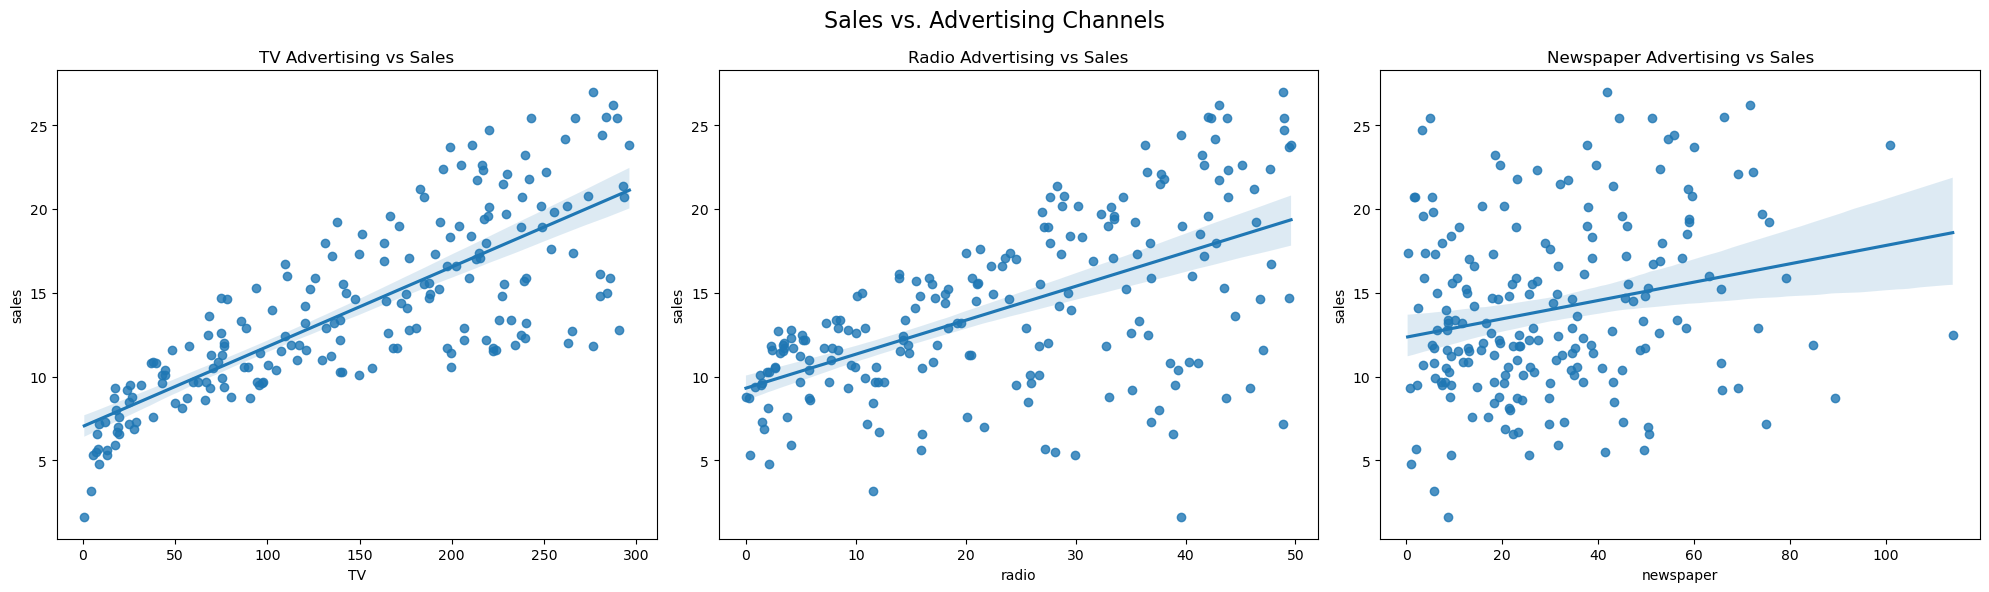

In [113]:
# Create individual scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Sales vs. Advertising Channels', fontsize=16)

# TV vs Sales
sns.regplot(data=df, x='TV', y='sales', ax=axes[0])
axes[0].set_title('TV Advertising vs Sales')

# Radio vs Sales
sns.regplot(data=df, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Radio Advertising vs Sales')

# Newspaper vs Sales
sns.regplot(data=df, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()

### Key Observations from Data Visualization

1. **Correlation Analysis**:
   - TV advertising shows the strongest positive correlation with sales
   - Radio advertising has a moderate positive correlation with sales
   - Newspaper advertising shows the weakest correlation with sales

2. **Relationships**:
   - TV: Shows a strong linear relationship with sales
   - Radio: Shows a moderate linear relationship with sales
   - Newspaper: Shows a weak and more scattered relationship with sales

3. **Interactions**:
   - There appears to be some interaction between different advertising channels
   - The correlation matrix shows relatively low correlation between different advertising methods
   - This suggests that each channel might contribute independently to sales

These insights will be valuable when we build and evaluate our regression models.

## 2-Data Processing

### Formatting Data

In [114]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3-Model Building

Using regularization technique:

In [115]:
from sklearn.linear_model import Ridge

In [116]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [117]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [118]:
y_pred = model.predict(X_test)

## 4-Evaluation

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
first_model_evaluation = mean_squared_error(y_test,y_pred)
first_model_evaluation

7.34177578903413

**Adjust Parameters and Re-evaluate**

In [121]:
model = Ridge(alpha=1)

In [122]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [123]:
y_pred = model.predict(X_test)

**New model's evaluation**

In [124]:
second_model_evaluation = mean_squared_error(y_test,y_pred)

print(f"first model's MSE: {first_model_evaluation}")
print(f"second model's MSE: {second_model_evaluation}")

first model's MSE: 7.34177578903413
second model's MSE: 2.319021579428752


Much better! We could repeat this until satisfied with performance metrics. (We previously showed RidgeCV can do this for us, but the purpose of this lecture is to generalize the CV process for any model).

----
# Part 2: Regularization with Train | Validation | Test Split


This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_val)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

## 2-Data Processing

### Formatting Data

In [125]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

In [126]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into validation and test sets
# Each is 15% of the original data size
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [127]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 3-Model Building

In [128]:
from sklearn.linear_model import Ridge, RidgeCV

In [129]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [130]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [131]:
y_val_pred = model.predict(X_val)

## 4 - Evaluation

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
first_model_evaluation = mean_squared_error(y_val,y_val_pred)
first_model_evaluation

7.320101458823871

**Adjust Parameters and Re-evaluate**

In [134]:
model = Ridge(alpha=1)

In [135]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [136]:
y_val_pred = model.predict(X_val)

**Second Model's Evaluation**

In [137]:
second_model_evaluation = mean_squared_error(y_val,y_val_pred)
second_model_evaluation

2.383783075056986

**Final Evaluation on test set (Can no longer edit parameters after this!)**

In [138]:
y_test_pred = model.predict(X_test)

In [139]:
second_model_test_evaluation = mean_squared_error(y_test,y_test_pred)
second_model_test_evaluation

2.254260083800517

In [140]:
print(f"first model's MSE: {first_model_evaluation}")
print(f"second model's MSE: {second_model_evaluation}")
print(f"second model's test MSE: {second_model_test_evaluation}")

first model's MSE: 7.320101458823871
second model's MSE: 2.383783075056986
second model's test MSE: 2.254260083800517


---
# Part 3: Reg. + Cross-validation using val_score

## 2-Data Processing

### Formatting Data

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3-Model Development

In [ ]:
model = Ridge(alpha=100)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [ ]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [ ]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

8.215396464543607

**Adjust model based on metrics**

In [ ]:
model = Ridge(alpha=1)

In [ ]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

## 4-Evaluation

In [ ]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

3.344839296530696

**Final Evaluation (Can no longer edit parameters after this!)**

In [ ]:
# Need to fit the model first!
model.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
y_final_test_pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_final_test_pred)

2.319021579428752

---
# Part 4: Reg. + GridSearchCV

## 2-Data Processing

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3-Model Development

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#help(ElasticNet)

In [ ]:
base_elastic_model = ElasticNet()

### Grid Search

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme 
* a score function.

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [ ]:
# pd.DataFrame(grid_model.cv_results_)

### Using Best Model From Grid Search

In [ ]:
y_pred = grid_model.predict(X_test)

## 4-Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

2.3873426420874737